## Importing Libraries

In [1]:
# Importing all the Libraries which we need
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Importing dataset

In [2]:
#Read the data
news_data = pd.read_csv(r"C:\Users\Sourav Shinde\OneDrive\Desktop\news.csv")

#Diplaying first 10 rows of dataset
news_data.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [3]:
#Diplaying last 10 rows of dataset
news_data.tail(10)

,Unnamed: 0,title,text,label
6325,8411,Will the Media Reset After the Election or Are...,Written by Peter Van Buren venerable New Yor...,FAKE
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [4]:
#Total number of dataset
print("# of news in dataset:" +str(len(news_data.index)))

# of news in dataset:6335


## Analyzing Data

In [5]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 123.8+ KB


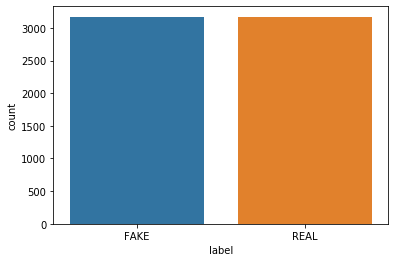

In [6]:
#Plotting countplot
sns.countplot(x="label",data=news_data)

## Data Wrangling

In [7]:
#Check wheather is there any null value in dataset
news_data.isnull()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6330,False,False,False,False
6331,False,False,False,False
6332,False,False,False,False
6333,False,False,False,False


In [8]:
news_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
#Check the datatypes
news_data.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [10]:
#Shape of the dataset
news_data.shape

(6335, 4)

In [11]:
news_data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Train Test

In [12]:
#Importing Train/Test Split
from sklearn.model_selection import train_test_split

In [13]:
# Reading the labels of data
new_labels = news_data.label
new_labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [14]:
X_train,X_test,y_train,y_test=train_test_split(news_data['text'], new_labels, test_size=0.30, random_state=2)

In [15]:
#Displaying Training data
X_train.head()

5914    Click Here To Learn More About Alexandra's Per...
5976    Opinions about the Supreme Court’s legitimacy ...
1999    As demonstrations erupted in Cologne on Saturd...
402     advertisement - learn more It’s been more than...
2123    This post was originally published on this sit...
Name: text, dtype: object

In [16]:
y_train.head()

5914    FAKE
5976    REAL
1999    REAL
402     FAKE
2123    FAKE
Name: label, dtype: object

In [17]:
#Importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
#Initialize a TfidfVectorizer
Vector1 = TfidfVectorizer(stop_words='english', max_df=0.75)

In [19]:
#Fit and transform train set, transform test set
tfid_train = Vector1.fit_transform(X_train)
tfid_test = Vector1.transform(X_test)

In [20]:
#Printing Tfid Testing data
print(tfid_test)

  (0, 57642)	0.03373509422903895
  (0, 57448)	0.03837886326702795
  (0, 57429)	0.025185046275938847
  (0, 56960)	0.02814603972052445
  (0, 56829)	0.1013221789307273
  (0, 56650)	0.026564673936167293
  (0, 56646)	0.03280749898130044
  (0, 56589)	0.0645016979918927
  (0, 56470)	0.041401392622408
  (0, 56384)	0.017763864123330066
  (0, 56314)	0.048084003124751695
  (0, 56228)	0.022787674239512272
  (0, 56122)	0.03025788556287346
  (0, 56119)	0.036319458607936374
  (0, 55947)	0.02956497346953798
  (0, 55573)	0.035620920363981574
  (0, 55566)	0.0726415529267636
  (0, 55560)	0.12751715618258805
  (0, 55555)	0.028744995875504428
  (0, 55554)	0.05878797530227306
  (0, 54697)	0.04114194896351888
  (0, 53222)	0.0732487164693044
  (0, 53214)	0.02480064275983072
  (0, 53125)	0.11322106157423747
  (0, 53055)	0.026905279163001415
  :	:
  (1900, 8825)	0.021505546379533003
  (1900, 6482)	0.07674719686924485
  (1900, 5280)	0.08198002822472236
  (1900, 5208)	0.06300263495809821
  (1900, 5059)	0.05647421

## Build a Classifier

In [21]:
#Importing PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [22]:
#Initialize a PassiveAggressiveClassifier
passa = PassiveAggressiveClassifier(max_iter=75)
passa.fit(tfid_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=75, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [23]:
#Import Accuracy_score
from sklearn.metrics import accuracy_score

In [24]:
#Predict on the test set and calculate accuracy
y_predictions=passa.predict(tfid_test)
final_score=accuracy_score(y_test,y_predictions)
print(f'Accuracy: {round(final_score*100,2)}%')

Accuracy: 92.95%


In [25]:
#Importing Confusion_matrix
from sklearn.metrics import confusion_matrix

In [26]:
#Build confusion matrix
confusion_matrix(y_test,y_predictions, labels=['FAKE','REAL'])

array([[911,  57],
       [ 77, 856]], dtype=int64)